### Negative reviews

In [1]:
%%capture
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import unicodedata
import fasttext
import re
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [3]:
# Created using create_df_sentences.py
df_sentences_1_star = pd.read_csv('../data/interim/sentences_1_star.csv')
df_sentences_2_stars = pd.read_csv('../data/interim/sentences_2_stars.csv')

In [4]:
df_negative_sentences = pd.concat([df_sentences_1_star, df_sentences_2_stars])

In [5]:
tfile = open('negative_sentences.txt', 'a')
tfile.write(df_negative_sentences['text_processed'].to_string())
tfile.close()

In [6]:
model = fasttext.train_unsupervised('negative_sentences.txt')

Read 0M words
Number of words:  2890
Number of labels: 0
Progress: 100.0% words/sec/thread:   71228 lr:  0.000000 avg.loss:  2.724609 ETA:   0h 0m 0s


In [7]:
df_negative_sentences['vec'] = df_negative_sentences['text_processed'].apply(lambda x: model.get_sentence_vector(str(x)))

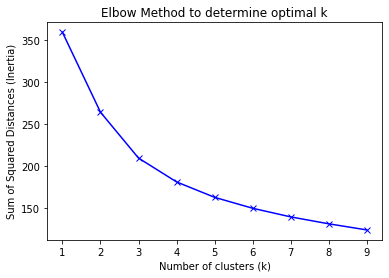

In [8]:
sum_squared_distances = []

K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_negative_sentences['vec'].values.tolist())
    sum_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method to determine optimal k')
plt.show()

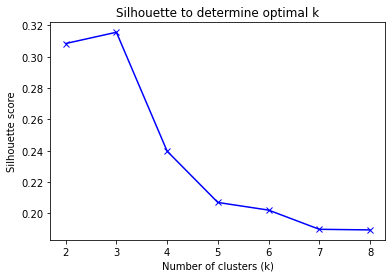

In [9]:
n_clusters_range = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for num_clusters in n_clusters_range:

    # fit Kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_negative_sentences['vec'].values.tolist())
    cluster_labels = kmeans.labels_

    # calculate silhouette
    silhouette_avg.append(silhouette_score(df_negative_sentences['vec'].values.tolist(), cluster_labels))

plt.plot(n_clusters_range, silhouette_avg, 'bx-')    
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette to determine optimal k')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3)

In [11]:
df_negative_sentences['cluster'] = kmeans.fit_predict(df_negative_sentences['vec'].values.tolist())

In [12]:
cluster_0 = df_negative_sentences[df_negative_sentences['cluster']==0]
cluster_1 = df_negative_sentences[df_negative_sentences['cluster']==1]
cluster_2 = df_negative_sentences[df_negative_sentences['cluster']==2]

In [13]:
def generate_wordcloud(df):
    text = ' '.join([str(i) for i in df['text_processed']])
    wordcloud = WordCloud(max_words=100, background_color='Black').generate(text)
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

##### **Cluster 0**

In [14]:
cluster_0 = df_negative_sentences[df_negative_sentences['cluster']==0]

In [20]:
cluster_0.sample(5)

text  review_index  \
3836                                  Nada recomendable           593   
710                                  Pésima experiencia           117   
2264                                     No hay espacio           360   
5206  En mi opinión por el precio que tiene no merec...           751   
2480  Pero la habitación que nos ha tocado es realme...           358   

                        text_processed  \
3836                 nada recomendable   
710                 pesima experiencia   
2264                        no espacio   
5206     opinion precio no merece pena   
2480  habitacion tocado realmente mala   

                                                    vec  cluster  
3836  [0.0050939484, 0.103690214, 0.06132099, -0.198...        0  
710   [-0.010823923, 0.12432374, 0.05597902, -0.2069...        0  
2264  [-0.0029683432, 0.113615595, 0.060177244, -0.2...        0  
5206  [-0.009496585, 0.10177882, 0.06801848, -0.2025...        0  
2480  [-0.010903122, 0.13681942, 0.045155622, -0.208...        0

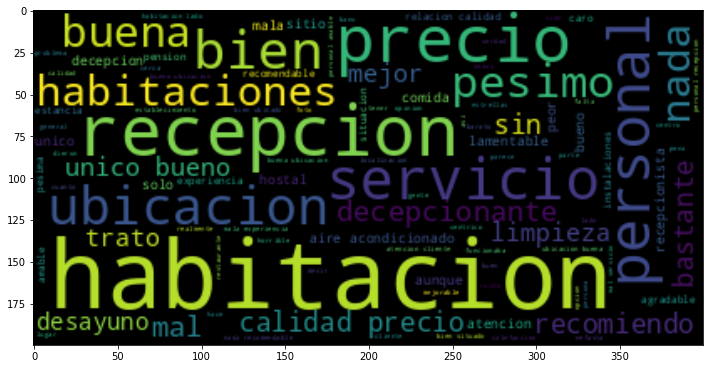

In [21]:
generate_wordcloud(cluster_0)

In [40]:
df_negative_sentences.loc[df_negative_sentences['cluster']==0, 'cluster'] = 'service and price'

In [22]:
n_sentences_c0 = len(cluster_0)
n_sentences = len(df_negative_sentences)
n_comments_c0 = cluster_0['review_index'].nunique()
n_comments = df_negative_sentences['review_index'].nunique()
perc_sentences_c0 = round(100*(n_sentences_c0/n_sentences))
perc_comments_c0 = round(100*(n_comments_c0/n_comments))

In [23]:
print(f'Total number of sentences (all clusters): {n_sentences}')
print(f'Number of sentences belonging to cluster 0: {n_sentences_c0}')
print(f'Percentage of sentences belonging to cluster 0: {perc_sentences_c0}')
print(f'Total number of comments: {n_comments}')
print(f'Number of comments that include sentences belonging to cluster 0: {n_comments_c0}')
print(f'Percentage of comments that include sentences belonging to cluster 0: {perc_comments_c0}')

Total number of sentences (all clusters): 19132
Number of sentences belonging to cluster 0: 3586
Percentage of sentences belonging to cluster 0: 19
Total number of comments: 1677
Number of comments that include sentences belonging to cluster 0: 1375
Percentage of comments that include sentences belonging to cluster 0: 82


##### **Cluster 1**

In [24]:
cluster_1 = df_negative_sentences[df_negative_sentences['cluster']==1]

In [28]:
cluster_1.sample(5)

text  review_index  \
1398                                   MALO, MALO, MALO           230   
9788  Para colmo las puertas eran de papel , escuchá...          1425   
3942                                                Mal           569   
4781                              Pésimo para descansar           732   
9444  Veniamos de pasar el fin de semana en un hosta...          1390   

                                         text_processed  \
1398                                     malo malo malo   
9788  colmo puertas papel escuchandose absolutamente...   
3942                                                mal   
4781                                   pesimo descansar   
9444  veniamos pasar fin semana hostal sevilla verda...   

                                                    vec  cluster  
1398  [-0.010168949, 0.13009104, 0.03401731, -0.1878...        1  
9788  [-0.0024355343, 0.09514972, 0.04259401, -0.168...        1  
3942  [-0.013847778, 0.16889155, 0.0204558, -0.19697...        1  
4781  [-0.012522464, 0.11045067, 0.038245864, -0.187...        1  
9444  [-0.0034885018, 0.1007862, 0.0414662, -0.16660...        1

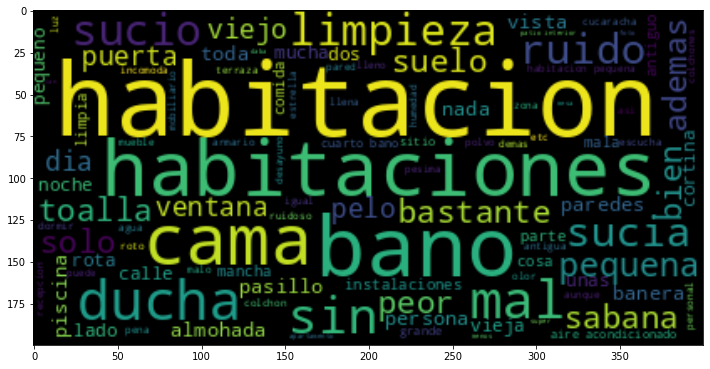

In [29]:
generate_wordcloud(cluster_1)

In [39]:
df_negative_sentences.loc[df_negative_sentences['cluster']==1, 'cluster'] = 'cleanliness and comfort'

In [30]:
n_sentences_c1 = len(cluster_1)
n_comments_c1 = cluster_1['review_index'].nunique()
perc_sentences_c1 = round(100*(n_sentences_c1/n_sentences))
perc_comments_c1 = round(100*(n_comments_c1/n_comments))

In [31]:
print(f'Total number of sentences (all clusters): {n_sentences}')
print(f'Number of sentences belonging to cluster 1: {n_sentences_c1}')
print(f'Percentage of sentences belonging to cluster 1: {perc_sentences_c1}')
print(f'Total number of comments: {n_comments}')
print(f'Number of comments that include sentences belonging to cluster 1: {n_comments_c1}')
print(f'Percentage of comments that include sentences belonging to cluster 1: {perc_comments_c1}')

Total number of sentences (all clusters): 19132
Number of sentences belonging to cluster 1: 3918
Percentage of sentences belonging to cluster 1: 20
Total number of comments: 1677
Number of comments that include sentences belonging to cluster 1: 1386
Percentage of comments that include sentences belonging to cluster 1: 83


##### **Cluster 2**

In [32]:
cluster_2 = df_negative_sentences[df_negative_sentences['cluster']==2]

In [35]:
cluster_2.sample(5)

text  review_index  \
7956  Este alojamiento deja mucho que desear , para ...          1185   
3332  Si usted considera que ofrece mucho por muy po...           515   
1313                       No volveré, no lo recomiendo           215   
5081  Únicamente que tuve un incidente con mi coche ...           776   
7528  De risa, les aconsejo que se queden en casa an...          1124   

                                         text_processed  \
7956  alojamiento deja desear empezar callejon basta...   
3332                 usted considera ofrece suba tarifa   
1313                           no volvere no recomiendo   
5081  unicamente incidente coche aparcado garaje qui...   
7528               risa aconsejo queden casa venir aqui   

                                                    vec  cluster  
7956  [-0.0017179265, 0.095786095, 0.040698342, -0.1...        2  
3332  [-0.0069146417, 0.079828426, 0.052703764, -0.1...        2  
1313  [0.0032077092, 0.058387056, 0.069980204, -0.17...        2  
5081  [-0.007422416, 0.08096435, 0.048523348, -0.163...        2  
7528  [-0.0010259849, 0.07990454, 0.053681366, -0.16...        2

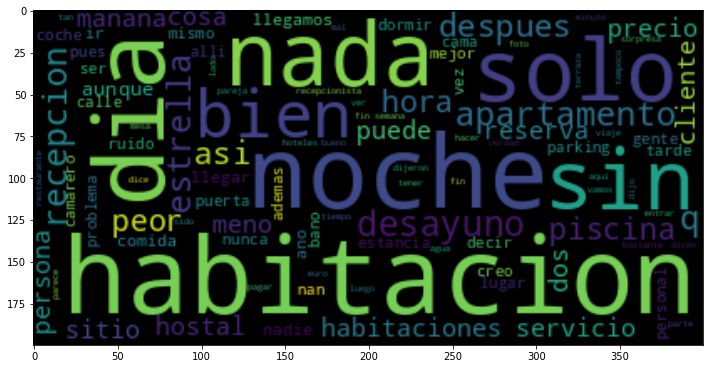

In [36]:
generate_wordcloud(cluster_2)

In [41]:
df_negative_sentences.loc[df_negative_sentences['cluster']==2, 'cluster'] = 'overall experience'

In [37]:
n_sentences_c2 = len(cluster_2)
n_comments_c2 = cluster_2['review_index'].nunique()
perc_sentences_c2 = round(100*(n_sentences_c2/n_sentences))
perc_comments_c2 = round(100*(n_comments_c2/n_comments))

In [38]:
print(f'Total number of sentences (all clusters): {n_sentences}')
print(f'Number of sentences belonging to cluster 2: {n_sentences_c2}')
print(f'Percentage of sentences belonging to cluster 2: {perc_sentences_c2}')
print(f'Total number of comments: {n_comments}')
print(f'Number of comments that include sentences belonging to cluster 2: {n_comments_c2}')
print(f'Percentage of comments that include sentences belonging to cluster 2: {perc_comments_c2}')

Total number of sentences (all clusters): 19132
Number of sentences belonging to cluster 2: 11628
Percentage of sentences belonging to cluster 2: 61
Total number of comments: 1677
Number of comments that include sentences belonging to cluster 2: 1662
Percentage of comments that include sentences belonging to cluster 2: 99


##### **Save csv**

In [42]:
df_negative_sentences.to_csv('../data/processed/negative_sentences_clusters.csv')

##### **Comments and sentences distribution**

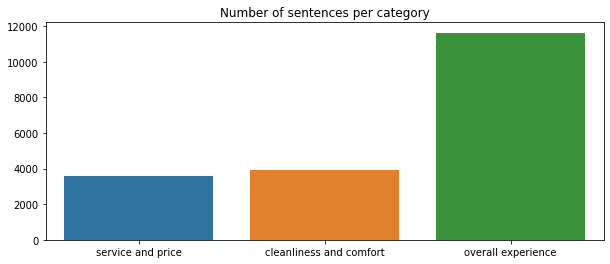

In [43]:
sentences_clusters = ['service and price', 'cleanliness and comfort', 'overall experience']
n_sentences = [n_sentences_c0, n_sentences_c1, n_sentences_c2]
plt.figure(figsize=(10,4))
sns.barplot(x=sentences_clusters, y=n_sentences)
plt.title('Number of sentences per category')
plt.show()

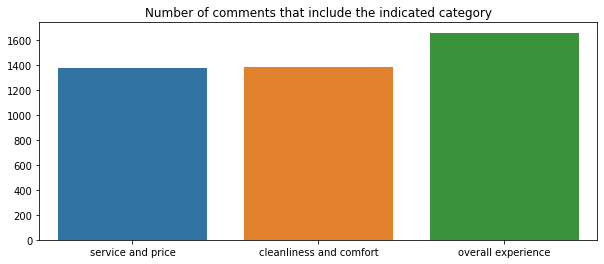

In [44]:
n_comments = [n_comments_c0, n_comments_c1, n_comments_c2]
plt.figure(figsize=(10,4))
sns.barplot(x=sentences_clusters, y=n_comments)
plt.title('Number of comments that include the indicated category')
plt.show()

##### **Clusters visualization**

In [45]:
# Main components to make 3D plot
pca = PCA(n_components=3)
df_negative_sentences['x'] = pca.fit_transform(df_negative_sentences['vec'].values.tolist())[:,0]
df_negative_sentences['y'] = pca.fit_transform(df_negative_sentences['vec'].values.tolist())[:,1]
df_negative_sentences['z'] = pca.fit_transform(df_negative_sentences['vec'].values.tolist())[:,2]

In [46]:
df_negative_sentences['cluster'] = df_negative_sentences['cluster'].astype('category')

In [47]:
fig = px.scatter_3d(df_negative_sentences, x='x', y='y', z='z', color='cluster')
fig.update_traces(marker_size = 2)
fig.show()

Reference:
https://towardsdatascience.com/making-sense-of-text-clustering-ca649c190b20#:~:text=For%20a%20refresh%2C%20clustering%20is,learn%20the%20pattern%20by%20itself.